<a href="https://colab.research.google.com/github/ericzhou16/NLP/blob/master/Projects/SentiAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from collections import defaultdict

nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
lm = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def text_transformation(doc):
    corpus = {}
    for word in doc:
        if word.isalpha() and word not in stop_words:
            corpus[lm.lemmatize(word.lower())] = True
    return corpus

In [ ]:
docs = [(movie_reviews.words(fid),cat) for fid in movie_reviews.fileids() for cat in movie_reviews.categories(fid)]
data = []
for doc in docs:
  data.append((text_transformation(doc[0]), doc[1]))
print(data[0])

({'plot': True, 'two': True, 'teen': True, 'couple': True, 'go': True, 'church': True, 'party': True, 'drink': True, 'drive': True, 'get': True, 'accident': True, 'one': True, 'guy': True, 'dy': True, 'girlfriend': True, 'continues': True, 'see': True, 'life': True, 'nightmare': True, 'deal': True, 'watch': True, 'movie': True, 'sorta': True, 'find': True, 'critique': True, 'mind': True, 'fuck': True, 'generation': True, 'touch': True, 'cool': True, 'idea': True, 'present': True, 'bad': True, 'package': True, 'make': True, 'review': True, 'even': True, 'harder': True, 'write': True, 'since': True, 'generally': True, 'applaud': True, 'film': True, 'attempt': True, 'break': True, 'mold': True, 'mess': True, 'head': True, 'lost': True, 'highway': True, 'memento': True, 'good': True, 'way': True, 'making': True, 'type': True, 'folk': True, 'snag': True, 'correctly': True, 'seem': True, 'taken': True, 'pretty': True, 'neat': True, 'concept': True, 'executed': True, 'terribly': True, 'proble

In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn import model_selection

from nltk.classify import NaiveBayesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, \
    classification_report

In [ ]:
train_data, test_data = model_selection.train_test_split(data,test_size = 0.2)
classifier = NaiveBayesClassifier.train(train_data)
print(nltk.classify.util.accuracy(classifier, test_data) * 100)
print(test_data[0])


66.25
({'american': True, 'action': True, 'film': True, 'slowly': True, 'drowning': True, 'death': True, 'sea': True, 'asian': True, 'wire': True, 'fu': True, 'copycat': True, 'pretty': True, 'leaving': True, 'like': True, 'schwartznager': True, 'stallone': True, 'van': True, 'damme': True, 'wearing': True, 'cement': True, 'galosh': True, 'bottom': True, 'kung': True, 'sometimes': True, 'mix': True, 'result': True, 'mind': True, 'blowing': True, 'spectacle': True, 'unlike': True, 'quality': True, 'amazing': True, 'exciting': True, 'stunt': True, 'work': True, 'matrix': True, 'real': True, 'gem': True, 'often': True, 'hollywood': True, 'get': True, 'wrong': True, 'even': True, 'pay': True, 'chinese': True, 'director': True, 'flying': True, 'ninja': True, 'floating': True, 'karate': True, 'master': True, 'replaced': True, 'soaring': True, 'bronx': True, 'detective': True, 'slow': True, 'motion': True, 'kicking': True, 'scientist': True, 'mostly': True, 'laughable': True, 'rush': True, 'e

In [ ]:
test_reviews = ["This movie was awesome, I really enjoyed it.", "The movie was boring.",
                "I liked the ending but the characters were too garbage", 
                "I did not like the characters but the awesome plotline outweighed the negatives",
                "Movie was lame"]
for review in test_reviews:
  words = review.split(" ")
  words = text_transformation(words)
  print(f"{review}: {classifier.classify(words)}\n")


This movie was awesome, I really enjoyed it.: pos

The movie was boring.: neg

I liked the ending but the characters were too garbage: neg

I did not like the characters but the awesome plotline outweighed the negatives: pos

Movie was lame: neg



In [ ]:
!pip install scikit-plot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, \
    classification_report
from scikitplot.metrics import plot_confusion_matrix
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def text_transformation2(docs):
    dat = []
    for doc in docs:
      s = []
      for word in doc[0]:
        if word.isalpha() and word not in stop_words:
            s.append(lm.lemmatize(word.lower()))
      dat.append((' '.join(str(w) for w in s), 0 if doc[1] == 'neg' else 1))
    df = pd.DataFrame(dat, columns=['Words', 'Labels'])
    return df

In [ ]:
cv = CountVectorizer(ngram_range=(1, 2))
print(len(docs))
train_docs, test_docs = model_selection.train_test_split(docs,test_size = 0.2)

train_corpus = text_transformation2(train_docs)
test_corpus = text_transformation2(test_docs)
train_bit = cv.fit_transform(list(train_corpus['Words']))
test_bit = cv.transform(list(test_corpus['Words']))


2000


In [ ]:
X, y = train_bit, train_corpus['Labels']
X_test, y_test = test_bit, test_corpus['Labels']
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)
print(X)

(1600, 443122)
(1600,)
(400, 443122)
(400,)
  (0, 300287)	1
  (0, 324763)	3
  (0, 268166)	1
  (0, 342803)	1
  (0, 74865)	3
  (0, 42266)	5
  (0, 352044)	5
  (0, 348769)	5
  (0, 148881)	1
  (0, 317992)	1
  (0, 282890)	1
  (0, 2475)	3
  (0, 194946)	1
  (0, 397350)	1
  (0, 396281)	1
  (0, 110049)	1
  (0, 406524)	2
  (0, 417533)	1
  (0, 435364)	3
  (0, 95947)	1
  (0, 243040)	1
  (0, 271647)	1
  (0, 285461)	1
  (0, 390760)	1
  (0, 260657)	1
  :	:
  (1599, 299366)	1
  (1599, 26528)	1
  (1599, 196601)	1
  (1599, 67398)	1
  (1599, 324861)	1
  (1599, 200835)	1
  (1599, 58720)	1
  (1599, 256048)	1
  (1599, 280443)	1
  (1599, 28492)	1
  (1599, 177393)	1
  (1599, 321313)	1
  (1599, 324891)	1
  (1599, 262544)	1
  (1599, 294595)	1
  (1599, 399440)	1
  (1599, 324827)	1
  (1599, 125429)	1
  (1599, 226917)	1
  (1599, 65412)	1
  (1599, 342201)	1
  (1599, 149471)	1
  (1599, 421874)	1
  (1599, 297257)	1
  (1599, 354588)	1


In [ ]:
rfc = RandomForestClassifier(max_depth=None,
                             n_estimators=500,
                             min_samples_split=5,
                             min_samples_leaf=500,
                             bootstrap=True)
rfc.fit(X, y)
predictions = rfc.predict(X_test)

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt

Accuracy_score:  0.48
Precision_score:  0.48
Recall_score:  1.0
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       208
           1       0.48      1.00      0.65       192

    accuracy                           0.48       400
   macro avg       0.24      0.50      0.32       400
weighted avg       0.23      0.48      0.31       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


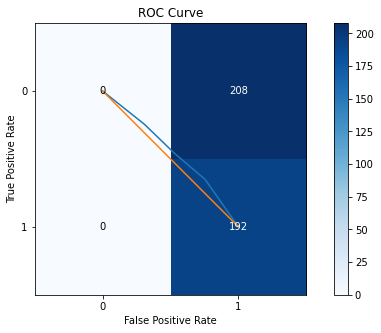

<Figure size 720x360 with 0 Axes>

In [ ]:
# Testing model
rcParams['figure.figsize'] = 10, 5
plot_confusion_matrix(y_test, predictions)
acc_score = accuracy_score(y_test, predictions)
pre_score = precision_score(y_test, predictions)
rec_score = recall_score(y_test, predictions)
print('Accuracy_score: ', acc_score)
print('Precision_score: ', pre_score)
print('Recall_score: ', rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test, predictions)
print(cr)

predictions_probability = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability[:, 0])
plt.plot(fpr, tpr)
plt.plot([0, 1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.savefig("ROSPlot.png")